In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/atac_buenrostro2018',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7']

In [3]:
sys.path.insert(1,'/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/')
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/atac_buenrostro2018',
 '/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip']

In [4]:
import simba as si
import os
si.__path__

['/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/simba']

In [5]:
workdir = 'result_buenrostro2018_using_peaks_sequences_v3'
si.settings.set_workdir(workdir)

Saving results in: result_buenrostro2018_using_peaks_sequences_v3


In [6]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

## preprocessing

In [7]:
adata_CP = si.read_h5ad("./input/data_processed/atac/atac_seq.h5ad")

In [8]:
adata_CP

AnnData object with n_obs × n_vars = 2034 × 237450
    obs: 'celltype'
    var: 'chr', 'start', 'end'

In [9]:
# si.pp.filter_cells_atac(adata,min_n_genes=100)
si.pp.filter_peaks(adata_CP,min_n_cells=3)

Before filtering: 
2034 cells, 237450 peaks
Filter peaks based on min_n_cells


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


After filtering out low-expressed peaks: 
2034 cells, 200167 peaks


In [10]:
si.pp.cal_qc_atac(adata_CP)

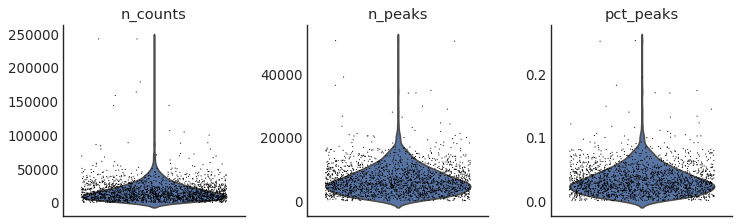

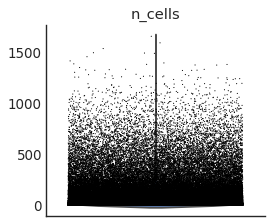

In [11]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'],fig_size=(3,3))

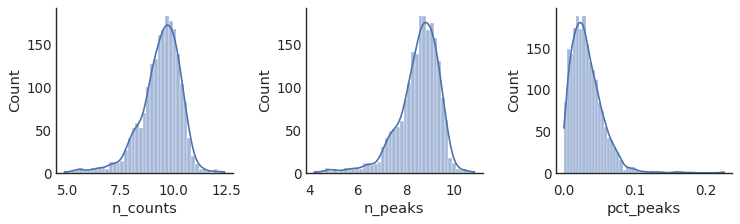

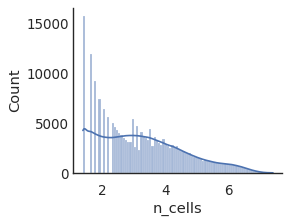

In [12]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'],fig_size=(3,3))

## Select peaks (optional)

> it will speed up the trainning process while only keeping peaks associated with top PCs

In [13]:
si.pp.pca(adata_CP, n_components=50)

the number of selected PC is: 50


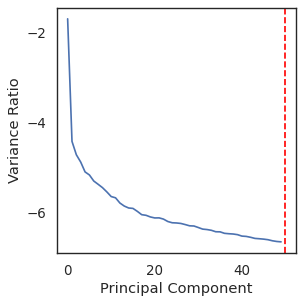

In [14]:
si.pl.pca_variance_ratio(adata_CP)

In [21]:
si.pl.pca_variance_ratio(adata_CP,save_fig=True)

the number of selected PC is: 50


In [16]:
#The number of selected PCs can be further reduced
si.pp.select_pcs(adata_CP,n_pcs=50)

In [17]:
si.pp.select_pcs_features(adata_CP)

#features selected from PC 0: 33368
#features selected from PC 1: 33415
#features selected from PC 2: 33361
#features selected from PC 3: 33397
#features selected from PC 4: 33375
#features selected from PC 5: 33431
#features selected from PC 6: 33395
#features selected from PC 7: 33442
#features selected from PC 8: 33372
#features selected from PC 9: 33376
#features selected from PC 10: 33364
#features selected from PC 11: 33393
#features selected from PC 12: 33372
#features selected from PC 13: 33434
#features selected from PC 14: 33369
#features selected from PC 15: 33395
#features selected from PC 16: 33422
#features selected from PC 17: 33379
#features selected from PC 18: 33366
#features selected from PC 19: 33498
#features selected from PC 20: 33365
#features selected from PC 21: 33569
#features selected from PC 22: 33364
#features selected from PC 23: 33376
#features selected from PC 24: 33427
#features selected from PC 25: 33367
#features selected from PC 26: 33381
#features s

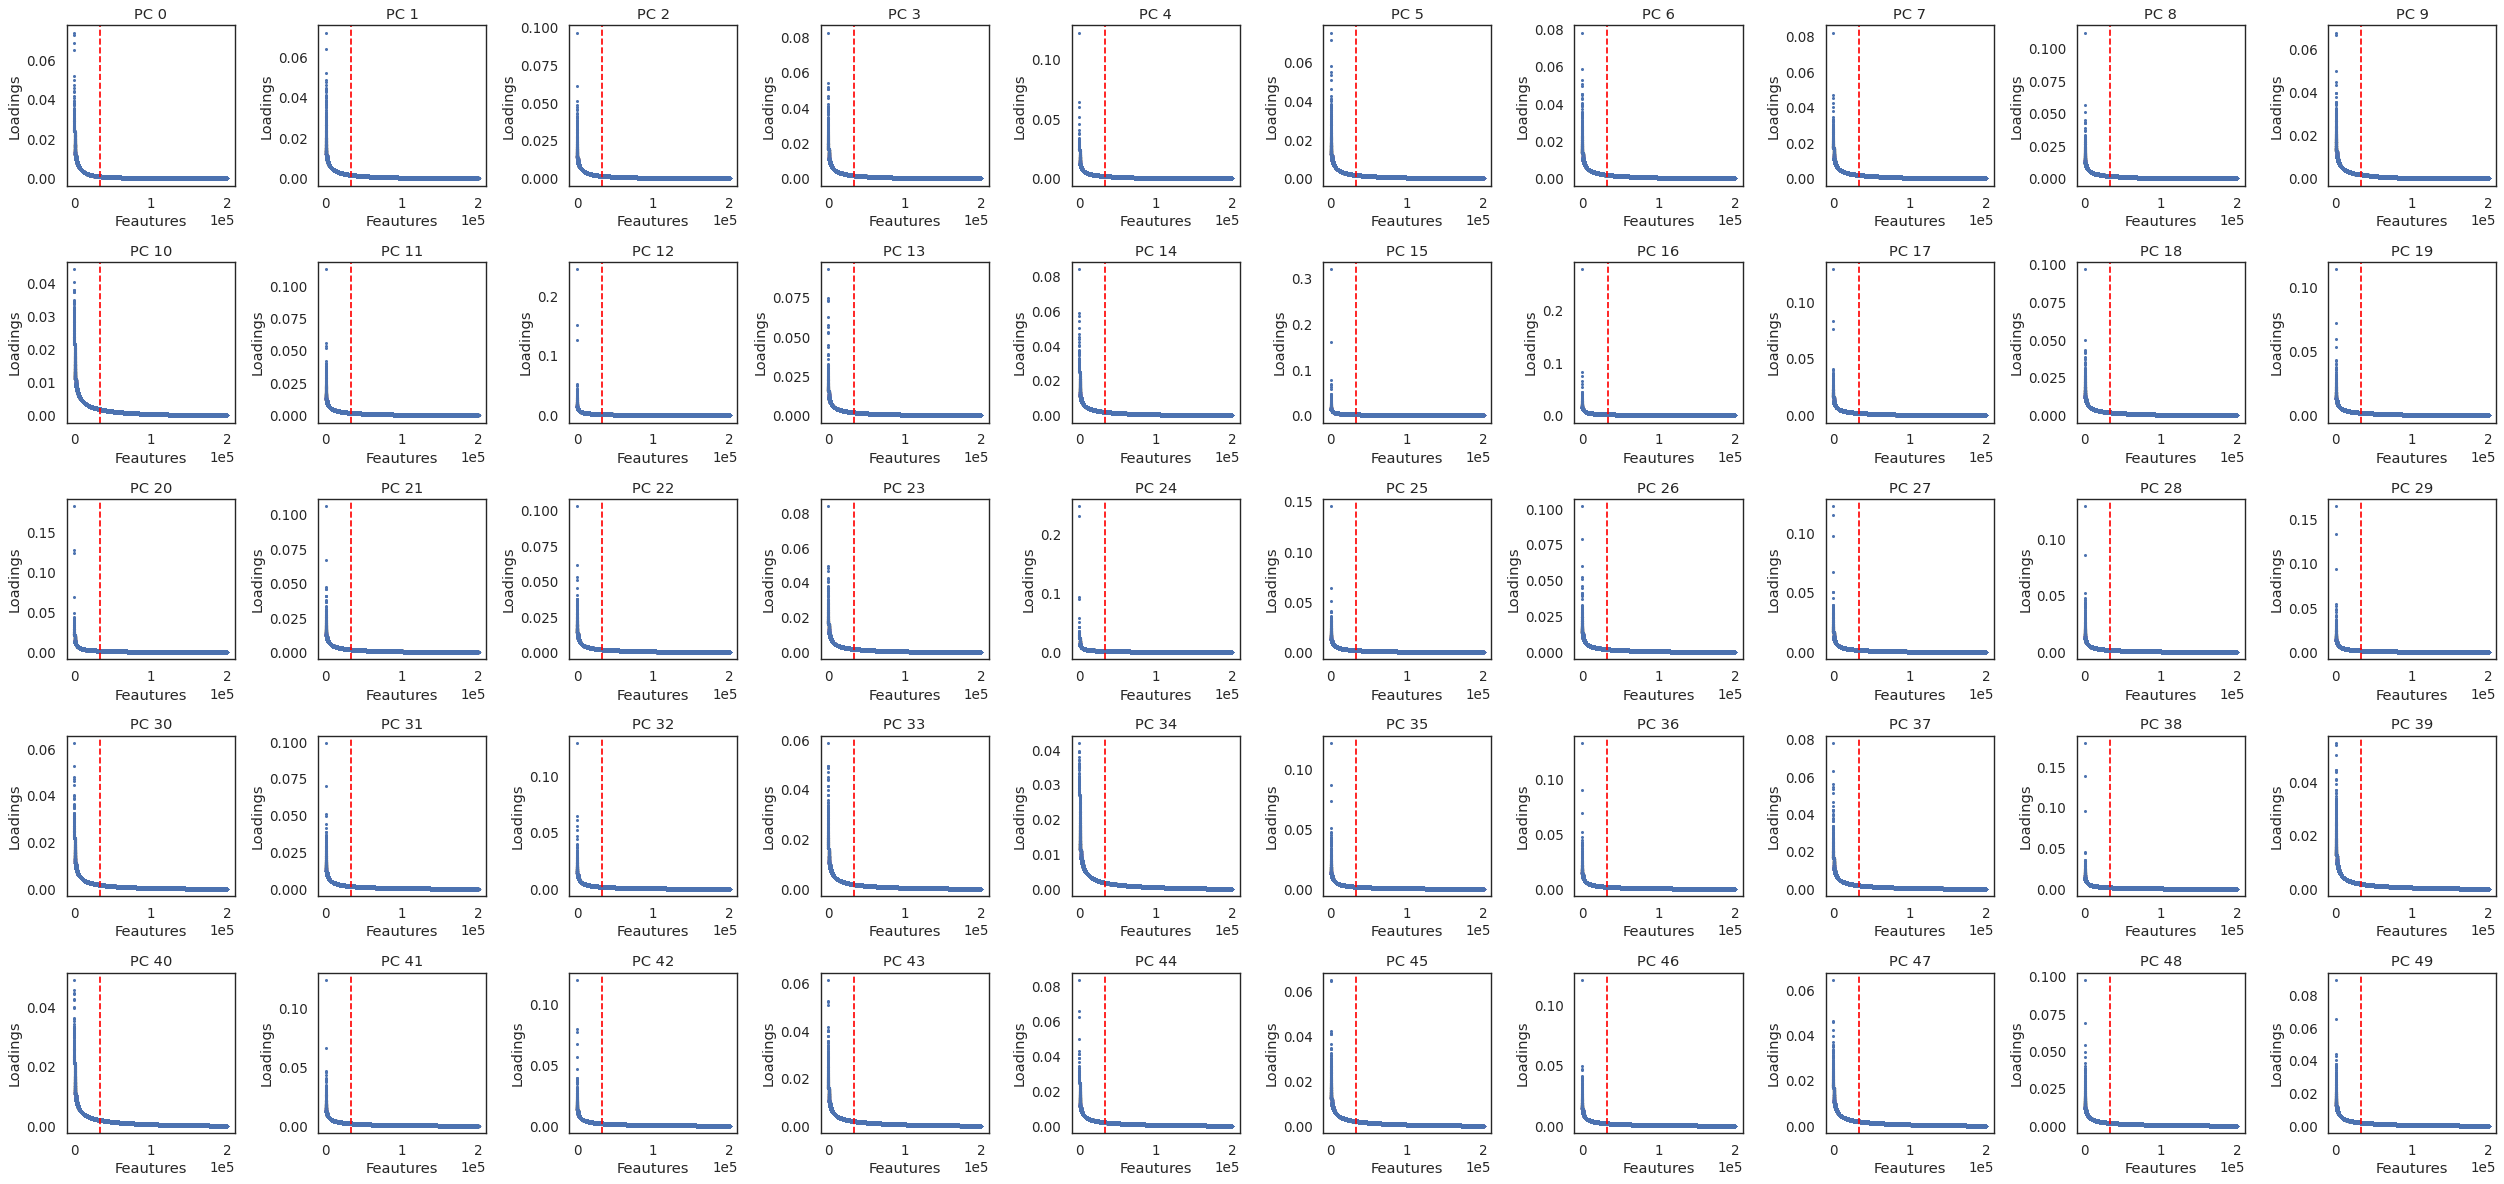

In [18]:
si.pl.pcs_features(adata_CP, fig_ncol=10)

In [20]:
si.pl.pcs_features(adata_CP, fig_ncol=10, save_fig=True, rasterized=True)

## Scan selected peaks for kmers and motifs

In [18]:
peaks_selected = adata_CP.var[adata_CP.var['top_pcs']][['chr','start','end']]
peaks_selected.to_csv(os.path.join(workdir,'peaks_selected.bed'),sep='\t',header=False,index=False)

* Run provided R script under the result directory  
```bash
Rscript ../../../Github/simba/R_scripts/scan_for_kmers_motifs.R -i peaks_selected.bed -g ../input/hg19/hg19.fa -s 'Homo sapiens'
```

In [54]:
adata_PK = si.read_hdf(os.path.join(workdir,'output_kmers_motifs/freq_kmer.h5'),'mat')
adata_PM = si.read_hdf(os.path.join(workdir,'output_kmers_motifs/freq_motif.h5'),'mat')

In [55]:
# convert byte string to string
adata_PK.obs.index = [x.decode('utf-8') for x in adata_PK.obs.index]
adata_PK.var.index = [x.decode('utf-8') for x in adata_PK.var.index]

adata_PM.obs.index = [x.decode('utf-8') for x in adata_PM.obs.index]
adata_PM.var.index = [x.decode('utf-8') for x in adata_PM.var.index]

In [56]:
adata_PK

AnnData object with n_obs × n_vars = 134535 × 4096

In [57]:
adata_PM

AnnData object with n_obs × n_vars = 134535 × 633

In [58]:
si.pp.binarize(adata_PK)
si.pp.binarize(adata_PM)

In [60]:
si.pp.pca(adata_PK, n_components=50)
si.pp.pca(adata_PM, n_components=50)

In [61]:
si.pp.select_pcs_features(adata_PK, min_elbow=adata_PK.shape[1]/5, S=5)
si.pp.select_pcs_features(adata_PM, min_elbow=adata_PM.shape[1]/5, S=5)

#features selected from PC 0: 819
#features selected from PC 1: 828
#features selected from PC 2: 1491
#features selected from PC 3: 1495
#features selected from PC 4: 1981
#features selected from PC 5: 1710
#features selected from PC 6: 1277
#features selected from PC 7: 1877
#features selected from PC 8: 819
#features selected from PC 9: 1622
#features selected from PC 10: 1464
#features selected from PC 11: 1523
#features selected from PC 12: 1557
#features selected from PC 13: 1671
#features selected from PC 14: 1767
#features selected from PC 15: 1755
#features selected from PC 16: 2032
#features selected from PC 17: 1975
#features selected from PC 18: 819
#features selected from PC 19: 1843
#features selected from PC 20: 2072
#features selected from PC 21: 1766
#features selected from PC 22: 1711
#features selected from PC 23: 1861
#features selected from PC 24: 2002
#features selected from PC 25: 1891
#features selected from PC 26: 1820
#features selected from PC 27: 1886
#featu

In [26]:
# si.pl.pcs_features(adata_PK )

In [27]:
# si.pl.pcs_features(adata_PM)

## Generate Graph

In [29]:
si.tl.gen_graph(list_CP=[adata_CP],
                list_PK=[adata_PK],
                list_PM=[adata_PM],
                copy=False,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: P
#edges: 12977763
relation1: source: P, destination: M
#edges: 5749259
relation2: source: P, destination: K
#edges: 57893992
Total number of edges: 76621014
Writing graph file "pbg_graph.txt" to "result_buenrostro2018_using_peaks_sequences_v3/pbg/graph0" ...
Finished.


## PBG training

In [30]:
dict_config = si.settings.pbg_params.copy()
# ## start training
# dict_config['wd'] = 0.00033
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, output='model')

Auto-estimated weight decay is 0.000309
Converting input data ...
[2021-04-13 09:47:41.243820] Using the 3 relation types given in the config
[2021-04-13 09:47:41.244198] Searching for the entities in the edge files...
[2021-04-13 09:49:23.390474] Entity type C:
[2021-04-13 09:49:23.391697] - Found 2034 entities
[2021-04-13 09:49:23.392006] - Removing the ones with fewer than 1 occurrences...
[2021-04-13 09:49:23.392833] - Left with 2034 entities
[2021-04-13 09:49:23.393114] - Shuffling them...
[2021-04-13 09:49:23.394596] Entity type P:
[2021-04-13 09:49:23.394855] - Found 134535 entities
[2021-04-13 09:49:23.395102] - Removing the ones with fewer than 1 occurrences...
[2021-04-13 09:49:23.423982] - Left with 134535 entities
[2021-04-13 09:49:23.424358] - Shuffling them...
[2021-04-13 09:49:23.512497] Entity type K:
[2021-04-13 09:49:23.512878] - Found 3601 entities
[2021-04-13 09:49:23.513154] - Removing the ones with fewer than 1 occurrences...
[2021-04-13 09:49:23.513950] - Left wi

[2021-04-13 09:50:12.994473] - Processed 9600000 edges so far...
[2021-04-13 09:50:13.511223] - Processed 9700000 edges so far...
[2021-04-13 09:50:14.021227] - Processed 9800000 edges so far...
[2021-04-13 09:50:14.526671] - Processed 9900000 edges so far...
[2021-04-13 09:50:15.030166] - Processed 10000000 edges so far...
[2021-04-13 09:50:15.537700] - Processed 10100000 edges so far...
[2021-04-13 09:50:16.045216] - Processed 10200000 edges so far...
[2021-04-13 09:50:16.552273] - Processed 10300000 edges so far...
[2021-04-13 09:50:17.057520] - Processed 10400000 edges so far...
[2021-04-13 09:50:17.564631] - Processed 10500000 edges so far...
[2021-04-13 09:50:18.084250] - Processed 10600000 edges so far...
[2021-04-13 09:50:18.590373] - Processed 10700000 edges so far...
[2021-04-13 09:50:19.097276] - Processed 10800000 edges so far...
[2021-04-13 09:50:19.603296] - Processed 10900000 edges so far...
[2021-04-13 09:50:20.120163] - Processed 11000000 edges so far...
[2021-04-13 09

[2021-04-13 09:51:15.004908] - Processed 22100000 edges so far...
[2021-04-13 09:51:15.493375] - Processed 22200000 edges so far...
[2021-04-13 09:51:15.981590] - Processed 22300000 edges so far...
[2021-04-13 09:51:16.469168] - Processed 22400000 edges so far...
[2021-04-13 09:51:16.960105] - Processed 22500000 edges so far...
[2021-04-13 09:51:17.449031] - Processed 22600000 edges so far...
[2021-04-13 09:51:17.937958] - Processed 22700000 edges so far...
[2021-04-13 09:51:18.428597] - Processed 22800000 edges so far...
[2021-04-13 09:51:18.918390] - Processed 22900000 edges so far...
[2021-04-13 09:51:19.406974] - Processed 23000000 edges so far...
[2021-04-13 09:51:19.897399] - Processed 23100000 edges so far...
[2021-04-13 09:51:20.389214] - Processed 23200000 edges so far...
[2021-04-13 09:51:20.880786] - Processed 23300000 edges so far...
[2021-04-13 09:51:21.370699] - Processed 23400000 edges so far...
[2021-04-13 09:51:21.878476] - Processed 23500000 edges so far...
[2021-04-1

[2021-04-13 09:52:16.416431] - Processed 34600000 edges so far...
[2021-04-13 09:52:16.906006] - Processed 34700000 edges so far...
[2021-04-13 09:52:17.395590] - Processed 34800000 edges so far...
[2021-04-13 09:52:17.887425] - Processed 34900000 edges so far...
[2021-04-13 09:52:18.375881] - Processed 35000000 edges so far...
[2021-04-13 09:52:18.865042] - Processed 35100000 edges so far...
[2021-04-13 09:52:19.365694] - Processed 35200000 edges so far...
[2021-04-13 09:52:19.854764] - Processed 35300000 edges so far...
[2021-04-13 09:52:20.343274] - Processed 35400000 edges so far...
[2021-04-13 09:52:20.840105] - Processed 35500000 edges so far...
[2021-04-13 09:52:21.329254] - Processed 35600000 edges so far...
[2021-04-13 09:52:21.817748] - Processed 35700000 edges so far...
[2021-04-13 09:52:22.308722] - Processed 35800000 edges so far...
[2021-04-13 09:52:22.797745] - Processed 35900000 edges so far...
[2021-04-13 09:52:23.285296] - Processed 36000000 edges so far...
[2021-04-1

[2021-04-13 09:53:17.998094] - Processed 47100000 edges so far...
[2021-04-13 09:53:18.492091] - Processed 47200000 edges so far...
[2021-04-13 09:53:18.994085] - Processed 47300000 edges so far...
[2021-04-13 09:53:19.487562] - Processed 47400000 edges so far...
[2021-04-13 09:53:19.980481] - Processed 47500000 edges so far...
[2021-04-13 09:53:20.474533] - Processed 47600000 edges so far...
[2021-04-13 09:53:20.967000] - Processed 47700000 edges so far...
[2021-04-13 09:53:21.461440] - Processed 47800000 edges so far...
[2021-04-13 09:53:21.954077] - Processed 47900000 edges so far...
[2021-04-13 09:53:22.448049] - Processed 48000000 edges so far...
[2021-04-13 09:53:22.939664] - Processed 48100000 edges so far...
[2021-04-13 09:53:23.431658] - Processed 48200000 edges so far...
[2021-04-13 09:53:23.925259] - Processed 48300000 edges so far...
[2021-04-13 09:53:24.416751] - Processed 48400000 edges so far...
[2021-04-13 09:53:24.911346] - Processed 48500000 edges so far...
[2021-04-1

[2021-04-13 09:54:19.824252] - Processed 59600000 edges so far...
[2021-04-13 09:54:20.317493] - Processed 59700000 edges so far...
[2021-04-13 09:54:20.810418] - Processed 59800000 edges so far...
[2021-04-13 09:54:21.316522] - Processed 59900000 edges so far...
[2021-04-13 09:54:21.809935] - Processed 60000000 edges so far...
[2021-04-13 09:54:22.303196] - Processed 60100000 edges so far...
[2021-04-13 09:54:22.809651] - Processed 60200000 edges so far...
[2021-04-13 09:54:23.303903] - Processed 60300000 edges so far...
[2021-04-13 09:54:23.796424] - Processed 60400000 edges so far...
[2021-04-13 09:54:24.299069] - Processed 60500000 edges so far...
[2021-04-13 09:54:24.792394] - Processed 60600000 edges so far...
[2021-04-13 09:54:25.287036] - Processed 60700000 edges so far...
[2021-04-13 09:54:25.780108] - Processed 60800000 edges so far...
[2021-04-13 09:54:26.275629] - Processed 60900000 edges so far...
[2021-04-13 09:54:26.767512] - Processed 61000000 edges so far...
[2021-04-1

[2021-04-13 09:55:21.624039] - Processed 72100000 edges so far...
[2021-04-13 09:55:22.114998] - Processed 72200000 edges so far...
[2021-04-13 09:55:22.622494] - Processed 72300000 edges so far...
[2021-04-13 09:55:23.114558] - Processed 72400000 edges so far...
[2021-04-13 09:55:23.604468] - Processed 72500000 edges so far...
[2021-04-13 09:55:24.106392] - Processed 72600000 edges so far...
[2021-04-13 09:55:24.596999] - Processed 72700000 edges so far...
[2021-04-13 09:55:25.090224] - Processed 72800000 edges so far...
[2021-04-13 09:55:25.589077] - Processed 72900000 edges so far...
[2021-04-13 09:55:26.081704] - Processed 73000000 edges so far...
[2021-04-13 09:55:26.574802] - Processed 73100000 edges so far...
[2021-04-13 09:55:27.066932] - Processed 73200000 edges so far...
[2021-04-13 09:55:27.560816] - Processed 73300000 edges so far...
[2021-04-13 09:55:28.050982] - Processed 73400000 edges so far...
[2021-04-13 09:55:28.549507] - Processed 73500000 edges so far...
[2021-04-1

In [31]:
si.settings.pbg_params = dict_config.copy()

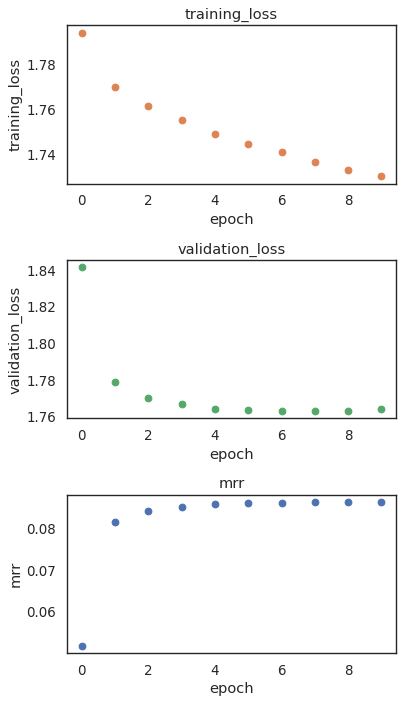

In [32]:
si.pl.pbg_metrics(fig_ncol=1)

In [33]:
si.pl.pbg_metrics(fig_ncol=1,save_fig=True,fig_name='graph0_model.pdf')

## Post-training Analysis

In [34]:
palette_celltype={'HSC':"#00441B", 'MPP':"#46A040", 'LMPP':"#00AF99", 'CMP':"#FFC179",'CLP':"#98D9E9",
                  'MEP':"#F6313E", 'GMP':"#FFA300", 'pDC':"#C390D4", 'mono':"#FF5A00",'UNK':"#333333"}

In [35]:
dict_adata = si.read_embedding()

In [36]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 2034 × 50,
 'K': AnnData object with n_obs × n_vars = 3601 × 50,
 'P': AnnData object with n_obs × n_vars = 134535 × 50,
 'M': AnnData object with n_obs × n_vars = 601 × 50}

In [37]:
adata_C = dict_adata['C']  # embeddings for cells
adata_P = dict_adata['P']  # embeddings for peaks
adata_M = dict_adata['M']  # embeddings for motifs
adata_K = dict_adata['K']  # embeddings for kmers

In [38]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50

In [39]:
adata_P

AnnData object with n_obs × n_vars = 134535 × 50

### visualize embeddings of cells

In [40]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CP[adata_C.obs_names,:].obs['celltype'].copy()

In [41]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50
    obs: 'celltype'

In [42]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

In [43]:
adata_C

AnnData object with n_obs × n_vars = 2034 × 50
    obs: 'celltype'
    obsm: 'X_umap'

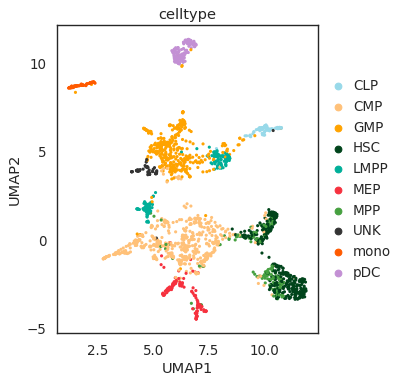

In [44]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},
           drawing_order='random')

In [45]:
si.pl.umap(adata_C,color=['celltype'],dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           save_fig=True,
           fig_name='umap_graph0_model.pdf')

In [63]:
adata_CP.write(os.path.join(workdir, 'adata_CP.h5ad'))
adata_PM.write(os.path.join(workdir, 'adata_PM.h5ad'))
adata_PK.write(os.path.join(workdir, 'adata_PK.h5ad'))
adata_C.write(os.path.join(workdir, 'adata_C.h5ad'))
adata_P.write(os.path.join(workdir, 'adata_P.h5ad'))
adata_K.write(os.path.join(workdir, 'adata_K.h5ad'))
adata_M.write(os.path.join(workdir, 'adata_M.h5ad'))

In [64]:
adata_all = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_M, adata_K, adata_P])

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;
Performing softmax transformation for query data 2;


In [65]:
## add annotations of all entities
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all.obs.loc[adata_P.obs_names, 'entity_anno'] = 'peak'
adata_all.obs.loc[adata_K.obs_names, 'entity_anno'] = 'kmer'
adata_all.obs.loc[adata_M.obs_names, 'entity_anno'] = 'motif'

In [66]:
adata_all

AnnData object with n_obs × n_vars = 140771 × 50
    obs: 'celltype', 'id_dataset', 'entity_anno'

In [67]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

In [74]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['peak'] = "#e5c2c8"
palette_entity_anno['kmer'] = "#94b1b7"
palette_entity_anno['motif'] = "#92ba79"

Trying to set attribute `.uns` of view, copying.


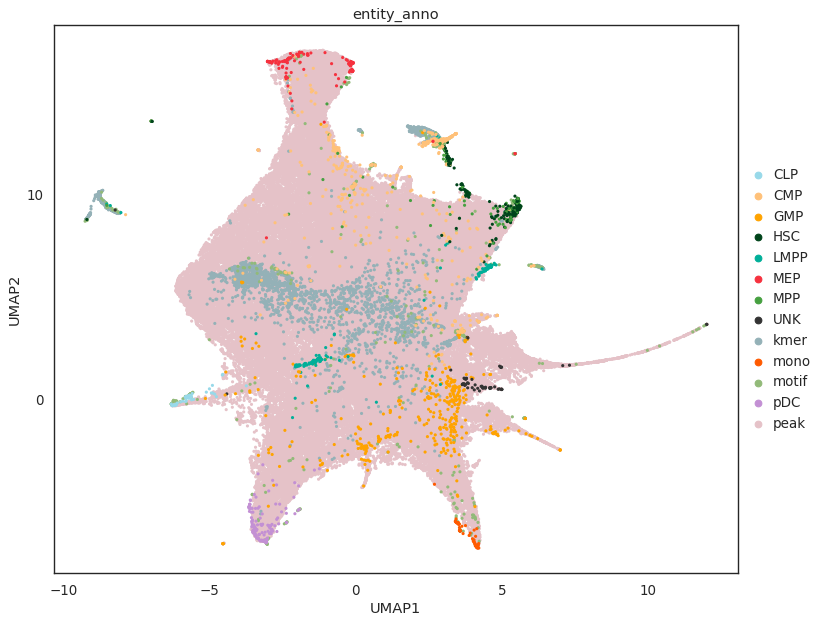

In [75]:
si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(10,8),
           drawing_order='original',
           show_texts=False)

In [76]:
adata_all.write(os.path.join(workdir,'adata_all.h5ad'))

... storing 'celltype' as categorical
... storing 'id_dataset' as categorical
... storing 'entity_anno' as categorical
